In [7]:
import json

import pandas as pd

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from flask import Flask
from flask import render_template, request, jsonify

import joblib
from sqlalchemy import create_engine
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import io
from io import BytesIO



# load data
engine = create_engine('sqlite:///../data/DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse', engine)




# index webpage displays cool visuals and receives user input text for model


    
    # extract data needed for visuals
    # TODO: Below is an example - modify to extract data for your own visuals
    



In [2]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26108,30261,The training demonstrated how to enhance micro...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26109,30262,A suitable candidate has been selected and OCH...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26110,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26111,30264,"Some 2,000 women protesting against the conduc...",None,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.message[:10]

0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2                      Looking for someone but no name
3    UN reports Leogane 80-90 destroyed. Only Hospi...
4    says: west side of Haiti, rest of the country ...
5               Information about the National Palace-
6                       Storm at sacred heart of jesus
7    Please, we need tents and water. We are in Sil...
8      I would like to receive the messages, thank you
9    I am in Croix-des-Bouquets. We have health iss...
Name: message, dtype: object

<Figure size 432x288 with 0 Axes>

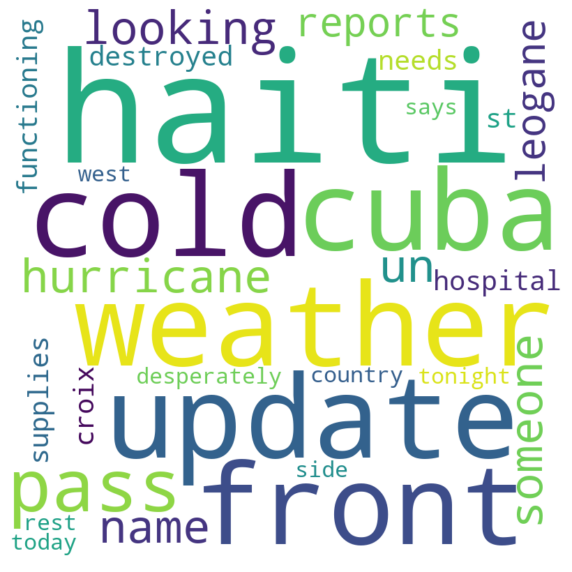

In [20]:
comment_words = '' 
stopwords = set(STOPWORDS)
for val in df.message[:5]:
        # typecaste each val to string 
    val = str(val) 
  
        # split the value 
    tokens = val.split() 
      
        # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
             background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)
'''fig = plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

img = io.BytesIO()
fig.savefig(img)

img.seek(0)
plt.close()'''

fig = plt.figure()
plt.figure(figsize=[10,18])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
    
plt.savefig('static/new.png')
#stream= BytesIO()
#image.save(stream, 'PNG')
#image.seek(0)
    
    #full_filename = img.seek(100)
    # create visuals
    # TODO: Below is an example - modify to create your own visuals
    #embed_code=wordcloud.get_embed_code(text=texts,random_color=False,topn=100)
    #figure = HTML(embed_code)
    
    # render web page with plotly graphs


